In [2]:
# Author: Alison Silldorff
# File: analysis_work_exploration3.ipynb
# Date: 4/7/25
# Purpose: Use SQL database to analyze data for exploration 3-- MOVIE MUSICALS
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import mysql.connector
from mysql.connector import Error
import json
from datetime import datetime
import csv
import unicodedata
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from scipy.stats import linregress

password = open("C:\\Users\\12676\\mysqlinfo", 'r').read()

In [3]:
connection = mysql.connector.connect(host='localhost', 
                                        database='shows_db',
                                        user='root',
                                        password=password, use_pure=True, buffered=True)

Let's first make standard versions of all the tables we need:

In [4]:
def take_year(date_elem):
    return date_elem.year

# query1 = "SELECT * FROM person"
# person_df = pd.read_sql_query(query1, con=connection)
# person_df['birth_date'] = person_df['birth_date'].apply(pd.to_datetime, errors="coerce")
# person_df['birth_year'] = person_df['birth_date'].apply(take_year)
# person_df['death_date'] = person_df['death_date'].apply(pd.to_datetime, errors="coerce")
# person_df['death_year'] = person_df['death_date'].apply(take_year)
# person_df.fillna('')

# query2 = "SELECT * FROM work_person"
# wp_df = pd.read_sql_query(query2, con=connection)
# wp_df.fillna('')

query3 = "SELECT * FROM work"
work_df = pd.read_sql_query(query3, con=connection)
work_df.fillna('')

query2 = "SELECT DISTINCT property_id FROM work"
prop_df = pd.read_sql_query(query2, con=connection)
prop_df.fillna('')

query4 = "SELECT * FROM stage_work"
stage_work_df = pd.read_sql_query(query4, con=connection)
stage_work_df['opening_date']=stage_work_df['opening_date'].apply(pd.to_datetime, errors="coerce")
stage_work_df['closing_date']=stage_work_df['closing_date'].apply(pd.to_datetime, errors="coerce")
#stage_work_df['opening_date'] = pd.to_datetime(stage_work_df['opening_date'], errors='coerce')
stage_work_df['closing_year']=stage_work_df['closing_date'].apply(pd.to_datetime, errors="coerce")
stage_work_df['closing_year'] = stage_work_df['closing_year'].apply(take_year).fillna(0).astype(int)
stage_work_df.fillna('')

# query4 = "SELECT * FROM actor"
# actor_df = pd.read_sql_query(query4, con=connection)
# actor_df.fillna('')

query5 = "SELECT * FROM screen_work"
screen_work_df = pd.read_sql_query(query5, con=connection)
screen_work_df.fillna('')

C:\Users\12676\AppData\Local\Temp\ipykernel_22232\2527966685.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  work_df = pd.read_sql_query(query3, con=connection)
C:\Users\12676\AppData\Local\Temp\ipykernel_22232\2527966685.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  prop_df = pd.read_sql_query(query2, con=connection)
C:\Users\12676\AppData\Local\Temp\ipykernel_22232\2527966685.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stage_work_df = pd.read_sql_query(query4, con=connection)
C:\Users\12676\AppData\Lo

,work_id,property_id,type_id,title,release_date,tmdb_url,us_origin,tmdb_popularity,budget,revenue,tmdb_rating,tmdb_vote_count,assoc_stage_work_id
0,00010021,0001,21,"It's a Bird, It's a Plane, It's Superman!",1975-02-21,themoviedb.org/movie/142064,1,1.160250,0.0,0.0,4.000,14,
1,00060021,0006,21,13: The Musical,2022-08-12,themoviedb.org/movie/673271,1,0.861963,0.0,0.0,6.013,40,
2,00100021,0010,21,1776,1972-11-09,themoviedb.org/movie/14902,1,0.367639,6000000.0,2800000.0,6.800,75,
3,00140022,0014,22,42nd Street,1986-08-01,themoviedb.org/movie/473572,1,0.066227,0.0,0.0,0.000,0,00140111
4,00140121,0014,21,42nd Street,1933-03-11,themoviedb.org/movie/3062,1,4.317750,439000.0,2281000.0,6.900,187,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,25290023,2529,23,Wonderful Town,2018-01-01,themoviedb.org/movie/575250,1,0.026429,0.0,0.0,0.000,0,
613,25290124,2529,24,Wonderful Town,2002-01-01,themoviedb.org/movie/265613,1,0.053536,0.0,0.0,0.000,0,
614,25290223,2529,23,Wonderful Town,1958-11-30,themoviedb.org/movie/301906,1,0.317500,0.0,0.0,6.600,5,
615,25370021,2537,21,Xanadu,1980-08-08,themoviedb.org/movie/15668,1,0.816431,20000000.0,22762571.0,5.700,266,


NOTE: do not re-run this without re-running the SQL scraping above.

In [5]:
screen_work_df = pd.merge(screen_work_df, work_df, on='work_id', how='inner')[['work_id', 'property_id_x', 'type_id_x', 'title_x', 'release_date',
       'tmdb_url', 'us_origin', 'tmdb_popularity', 'budget', 'revenue',
       'tmdb_rating', 'tmdb_vote_count', 'assoc_stage_work_id','year']]
screen_work_df.columns = ['work_id', 'property_id', 'type_id', 'title', 'release_date',
       'tmdb_url', 'us_origin', 'tmdb_popularity', 'budget', 'revenue',
       'tmdb_rating', 'tmdb_vote_count', 'assoc_stage_work_id','year']

stage_work_df = pd.merge(stage_work_df, work_df, on='work_id', how='inner')[['work_id', 'property_id_x', 'type_id_x', 'title_x', 'ibdb_url',
       'opening_date', 'preview_start_date', 'closing_date','year', 'closing_year']]
stage_work_df.columns = ['work_id', 'property_id', 'type_id', 'title', 'ibdb_url',
       'opening_date', 'preview_start_date', 'closing_date','year', 'closing_year']
stage_work_df.loc[((stage_work_df['closing_year']==0) & (stage_work_df['year']>=1995)), 'closing_year'] = 2025
stage_work_df.loc[((stage_work_df['closing_year']==0) & (stage_work_df['year']<1995)), 'closing_year'] = stage_work_df['year']
stage_work_df['run_length']=(stage_work_df['closing_date'] - stage_work_df['opening_date']).dt.days / 365


C:\Users\12676\AppData\Local\Temp\ipykernel_22232\3927678444.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1897 1952 1981 1912 1935 1935 1899 1935 1859 1914 1938 1857 1932 1939
 1898 1914 1885 1938 1938 1879 1935 1875 1898 1939 1882 1938 1938 1897
 1840 1939 1881 1938 1935 1883 1935 1891 1900 1840 1921 1938 1920 1905
 1896 1939 1890 1938 1941 1899 1881 1939 1939 1939 1879 1893 1938 1904
 1936 1894 1936 1897 1939 1888 1938 1935 1938 1935 1918]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  stage_work_df.loc[((stage_work_df['closing_year']==0) & (stage_work_df['year']<1995)), 'closing_year'] = stage_work_df['year']


In [6]:
stage_work_df.loc[stage_work_df['run_length']>20]

,work_id,property_id,type_id,title,ibdb_url,opening_date,preview_start_date,closing_date,year,closing_year,run_length
2594,21740011,2174,11,The Phantom of the Opera,/broadway-production/the-phantom-of-the-opera-...,1988-01-26,1988-01-09,2023-04-16,1988,2023,35.243836


In [7]:
query1 = "SELECT * FROM ibdb_tag"
tags_df = pd.read_sql_query(query1, con=connection)

C:\Users\12676\AppData\Local\Temp\ipykernel_22232\3839462032.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tags_df = pd.read_sql_query(query1, con=connection)


In [8]:
tags_to_remove = ['Opera', 'Operetta', 'Revue', 'Extravaganza', 'Vaudeville', 'Burlesque', 'Minstrel', 'Variety', 'Ballet'] # continue updating this
ids_to_remove = set()
properties_to_remove = set()
tags_df
# remove things by tag
for key, row in tags_df.iterrows():
    if row['work_id'] in ids_to_remove:
        continue
    if row['property_id'] in properties_to_remove:
        ids_to_remove.add(row['work_id'])
    if row['tag_name'] in tags_to_remove:
        ids_to_remove.add(row['work_id'])
        properties_to_remove.add(row['property_id'])

In [9]:
# work_person by stage and screen
work_df_strict = work_df[~work_df['property_id'].isin(properties_to_remove)]
stage_work_df_strict = stage_work_df[~stage_work_df['property_id'].isin(properties_to_remove)]
screen_work_df_strict = screen_work_df[~screen_work_df['property_id'].isin(properties_to_remove)]

Let's give an indicator on prop_df with the work_id and type_id of the first version of it. Columns first_work_id, first_type_id, st_..., sc_...

In [10]:
first_work_df = work_df.loc[work_df.groupby('property_id')['year'].idxmin()]
prop_df = pd.merge(first_work_df, prop_df, on='property_id', how='inner')[['property_id', 'title', 'work_id', 'type_id', 'year']]
prop_df.columns = ['property_id', 'prop_title','first_work_id', 'first_type_id', 'first_year']

first_stage_df = work_df[work_df['type_id'].isin(['11', '12', '13', '14'])]
first_stage_df = first_stage_df.loc[first_stage_df.groupby('property_id')['year'].idxmin()]

first_screen_df = work_df[work_df['type_id'].isin(['21', '22', '23', '24'])]
first_screen_df = first_screen_df.loc[first_screen_df.groupby('property_id')['year'].idxmin()]

prop_df = pd.merge(prop_df, first_stage_df, on='property_id', how='left')[['property_id', 'prop_title', 'first_work_id', 'first_type_id', 'first_year', 'work_id', 'type_id',
       'year']]
prop_df.columns = ['property_id', 'prop_title','first_work_id', 'first_type_id', 'first_year', 'st_first_work_id', 'st_first_type_id','st_first_year']

prop_df = pd.merge(prop_df, first_screen_df, on='property_id', how='left')[['property_id', 'prop_title','first_work_id', 'first_type_id', 'first_year',
       'st_first_work_id', 'st_first_type_id', 'st_first_year', 'work_id', 'type_id', 'year']]
prop_df.columns = ['property_id', 'prop_title','first_work_id', 'first_type_id', 'first_year',
       'st_first_work_id', 'st_first_type_id', 'st_first_year', 'sc_first_work_id', 'sc_first_type_id', 'sc_first_year']


Let's make a similar df that only includes first MOVIE, not other kinds of screen works.

In [11]:
first_work_df = work_df.loc[work_df.groupby('property_id')['year'].idxmin()]
prop_movie_df = pd.merge(first_work_df, prop_df, on='property_id', how='inner')[['property_id', 'title', 'work_id', 'type_id', 'year']]
prop_movie_df.columns = ['property_id', 'prop_title','first_work_id', 'first_type_id', 'first_year']

first_stage_df = work_df[work_df['type_id'].isin(['11', '12', '13', '14'])]
first_stage_df = first_stage_df.loc[first_stage_df.groupby('property_id')['year'].idxmin()]

first_screen_df = work_df[work_df['type_id'].isin(['21'])]
first_screen_df = first_screen_df.loc[first_screen_df.groupby('property_id')['year'].idxmin()]

prop_movie_df = pd.merge(prop_movie_df, first_stage_df, on='property_id', how='left')[['property_id', 'prop_title', 'first_work_id', 'first_type_id', 'first_year', 'work_id', 'type_id',
       'year']]
prop_movie_df.columns = ['property_id', 'prop_title','first_work_id', 'first_type_id', 'first_year', 'st_first_work_id', 'st_first_type_id','st_first_year']

prop_movie_df = pd.merge(prop_movie_df, first_screen_df, on='property_id', how='left')[['property_id', 'prop_title','first_work_id', 'first_type_id', 'first_year',
       'st_first_work_id', 'st_first_type_id', 'st_first_year', 'work_id', 'type_id', 'year']]
prop_movie_df.columns = ['property_id', 'prop_title','first_work_id', 'first_type_id', 'first_year',
       'st_first_work_id', 'st_first_type_id', 'st_first_year', 'sc_first_work_id', 'sc_first_type_id', 'sc_first_year']

In [12]:
strict_prop_df = prop_df[~prop_df['property_id'].isin(properties_to_remove)]

Let's start by plotting the year difference for things that started off as movies

C:\Users\12676\AppData\Local\Temp\ipykernel_22232\2350150576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_first_df['years_before_screen'] = st_first_df['sc_first_year']-st_first_df['first_year']
C:\Users\12676\AppData\Local\Temp\ipykernel_22232\2350150576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_first_movie_df['years_before_screen'] = st_first_movie_df['sc_first_year']-st_first_movie_df['first_year']


    property_id       prop_title first_work_id first_type_id  first_year  \
694        0700  H.M.S. Pinafore      07000411            11        1879   

    st_first_work_id st_first_type_id  st_first_year sc_first_work_id  \
694         07000411               11           1879         07000621   

    sc_first_type_id  sc_first_year  years_before_screen  
694               21         1997.0                118.0  


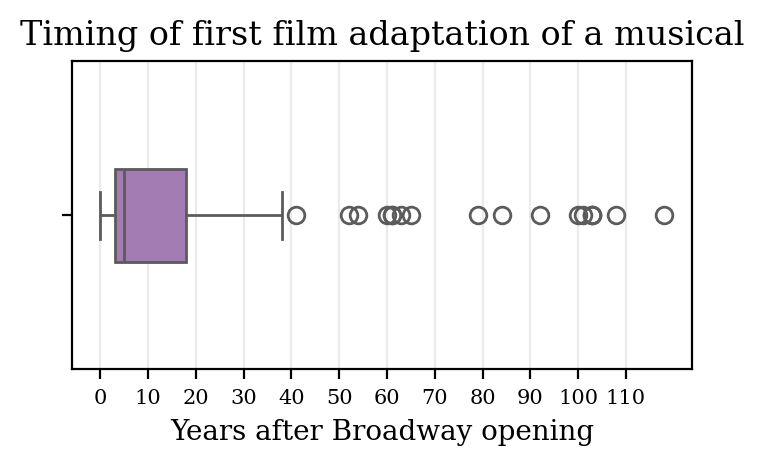

In [13]:
sc_first_df = prop_df[prop_df['first_type_id'].isin(['21', '22', '23', '24'])]
sc_first_df
st_first_df = prop_df[prop_df['first_type_id'].isin(['11', '12', '13', '14'])]
st_first_df['years_before_screen'] = st_first_df['sc_first_year']-st_first_df['first_year']

st_first_movie_df = prop_movie_df[prop_movie_df['first_type_id'].isin(['11', '12', '13', '14'])]
st_first_movie_df['years_before_screen'] = st_first_movie_df['sc_first_year']-st_first_movie_df['first_year']
print(st_first_movie_df[st_first_movie_df['years_before_screen']==st_first_movie_df['years_before_screen'].max()])

#plt.scatter(sc_first_df['sc_first_year'], sc_first_df['st_first_year'])
#plt.scatter(st_first_df['st_first_year'], st_first_df['sc_first_year'], s=8)
fig, ax = plt.subplots(figsize=(4, 2))
plt.grid(axis='x', alpha=0.25)
plt.xticks(range(0, 120, 10), fontfamily='serif', fontsize=7.5)
plt.title('Timing of first film adaptation of a musical', fontfamily='serif', fontsize=12)
plt.xlabel('Years after Broadway opening', fontfamily="serif")
sns.boxplot(data=st_first_movie_df, x='years_before_screen', width=0.3, color='#a873bd')
plt.show()

Let's try to use some sort of density measure to track this:

C:\Users\12676\AppData\Local\Temp\ipykernel_22232\2336132421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_st_sc_df['work_present'] = 1
C:\Users\12676\AppData\Local\Temp\ipykernel_22232\2336132421.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes = filt_event_df.groupby('property_id').apply(lambda group: linregress(group['year'], group['cum_works']).slope).reset_index()


Text(0, 0.5, 'Cumulative screen and stage works')

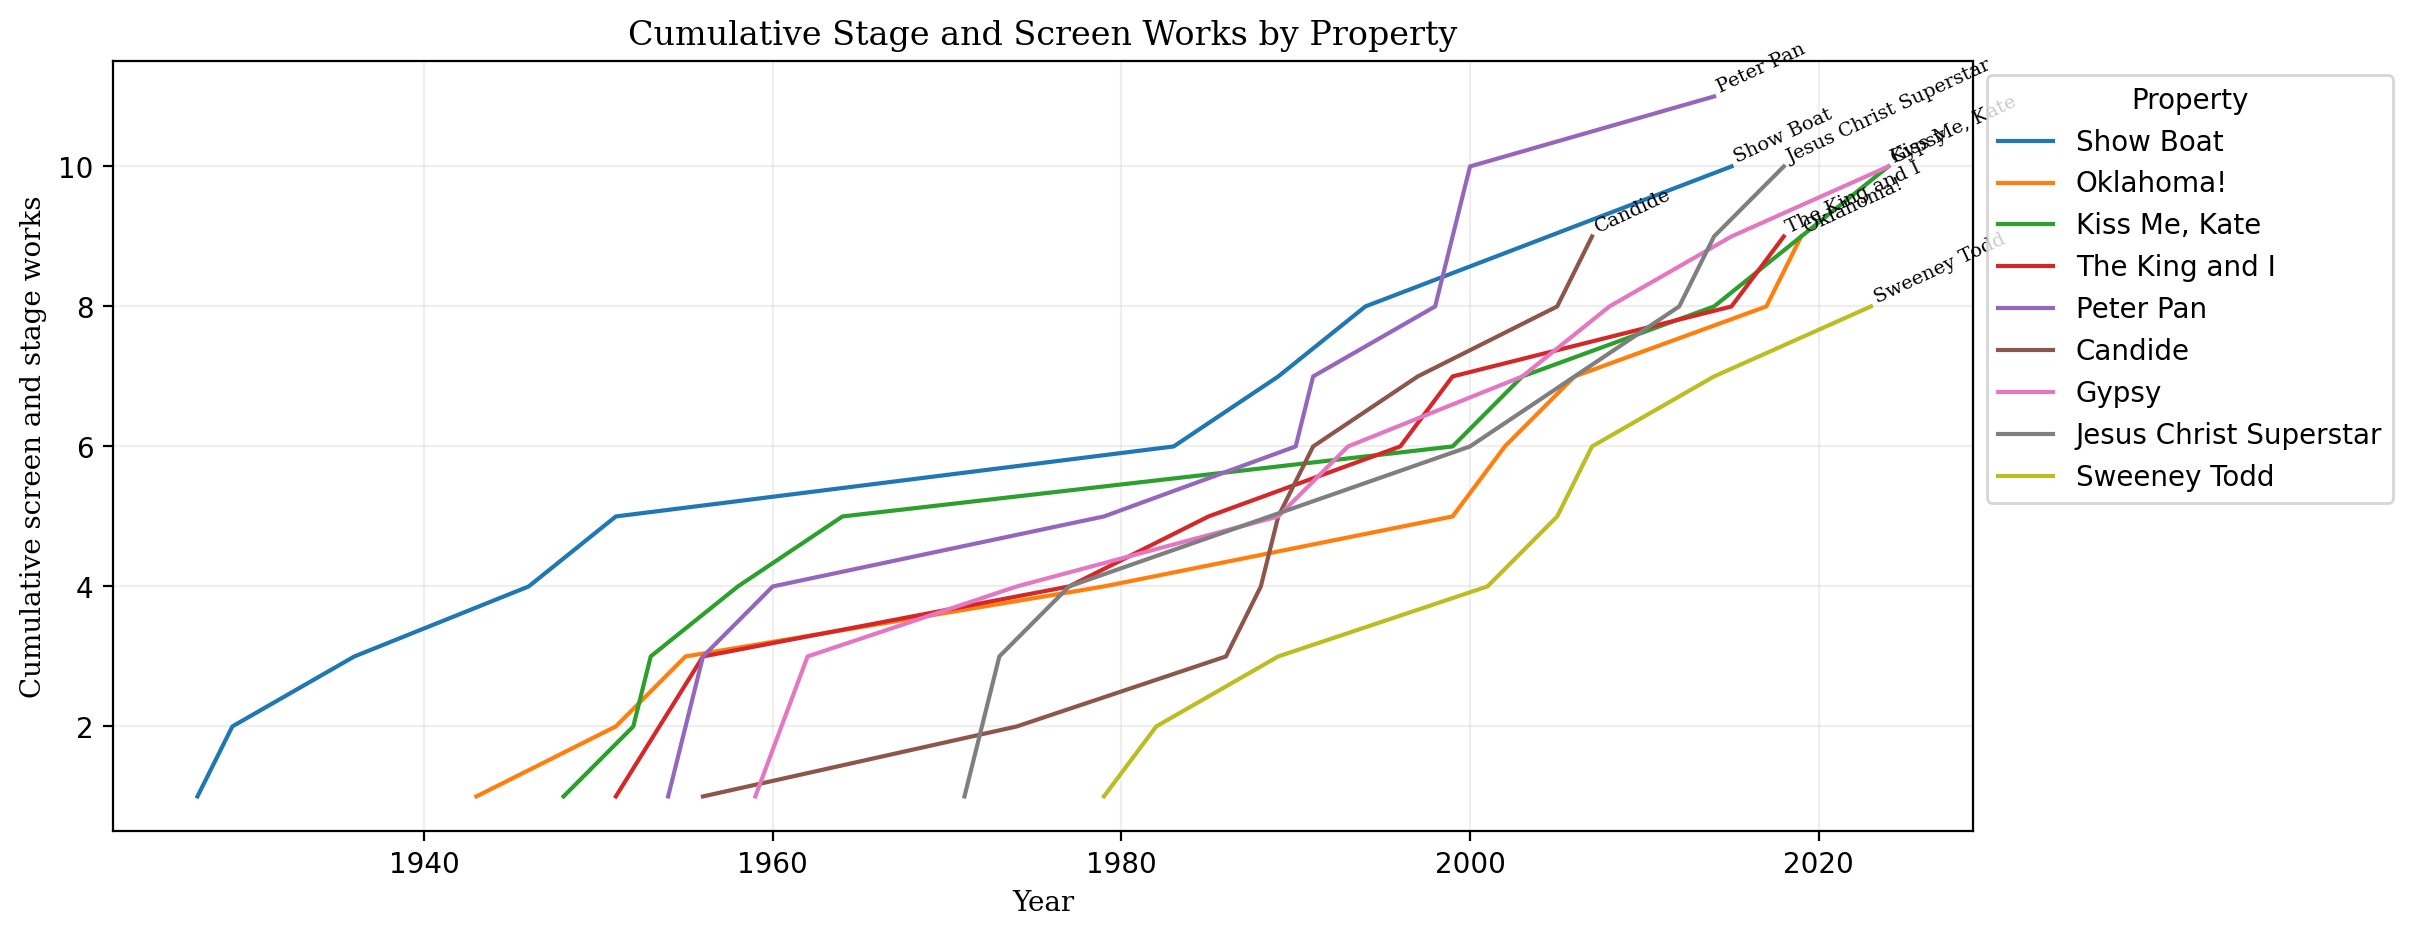

In [ ]:
# let's start by redefining the df we're working with.
#st_sc_df = work_df_strict.copy()
st_sc_df = work_df_strict.loc[work_df_strict['type_id'].isin(['11', '12', '13', '14', '21', '22'])]
st_sc_df = work_df_strict.copy()


counts = st_sc_df['property_id'].value_counts()
valid_ids = counts[counts >= 2].index
filt_st_sc_df = st_sc_df[st_sc_df['property_id'].isin(valid_ids)]
#filt_st_sc_df['years_post_og'] = filt_st_sc_df['year']-filt_st_sc_df['death_year']
filt_st_sc_df['work_present'] = 1

event_df = filt_st_sc_df.groupby(['property_id', 'year'])['work_present'].sum().reset_index()

event_df = event_df.sort_values(by='year')

event_df['cum_works'] = event_df.groupby('property_id')['work_present'].cumsum()
counts = st_sc_df['property_id'].value_counts()
valid_ids = counts[counts >= 8].index
filt_event_df = event_df[event_df['property_id'].isin(valid_ids)]
# some_names = ['Stephen Sondheim', 'Richard Rodgers', 'Oscar Hammerstein II', 'Fred Ebb', 'Frank Loesser', 'Alan Jay Lerner', 'Leonard Bernstein']
# filt_event_df2 = event_df[event_df['name'].isin(some_names)]

# let's try filtering by steepest slope:
slopes = filt_event_df.groupby('property_id').apply(lambda group: linregress(group['year'], group['cum_works']).slope).reset_index()
slopes.columns = ['property_id', 'slope']

# Step 2: Filter top-N steepest (absolute slope)
top_n = 15
top_props = slopes.reindex(slopes['slope'].abs().sort_values(ascending=False).index).head(top_n)['property_id']

# Step 3: Filter original data
slope_df = filt_event_df[filt_event_df['property_id'].isin(top_props)]

# Plot cumulative sum
plt.figure(figsize=(12, 5))
plot = sns.lineplot(data=filt_event_df, x='year', y='cum_works', hue='property_id')
label_map = dict(zip(stage_work_df['property_id'], stage_work_df['title']))
handles, labels = plot.get_legend_handles_labels()
new_labels = [label_map.get(label, label) for label in labels]
plot.legend(handles=handles, labels=new_labels, title='Property',bbox_to_anchor=(1, 1))

for property_id in filt_event_df['property_id'].unique():
    # Get the final point for each author
    final_data = filt_event_df[filt_event_df['property_id'] == property_id].iloc[-1]
    # Place the author's name at the final point
    plt.text(final_data['year'], final_data['cum_works'], label_map[property_id],
             horizontalalignment='left', verticalalignment='bottom', fontsize=7, fontfamily='serif', rotation=25)

#plt.title('Timing of first film adaptation of a musical', fontfamily='serif', fontsize=12)
plt.title('Cumulative Stage and Screen Works by Property', fontfamily="serif")
plt.grid(alpha=0.2)
plt.xlabel('Year', fontfamily="serif")
plt.ylabel('Cumulative screen and stage works', fontfamily="serif")

Let's try to add a weight for each year a production is open on Broadway:

C:\Users\12676\AppData\Local\Temp\ipykernel_22232\1044439101.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes = filt_event_df.groupby('property_id').apply(lambda group: linregress(group['year'], group['cum_works']).slope).reset_index()


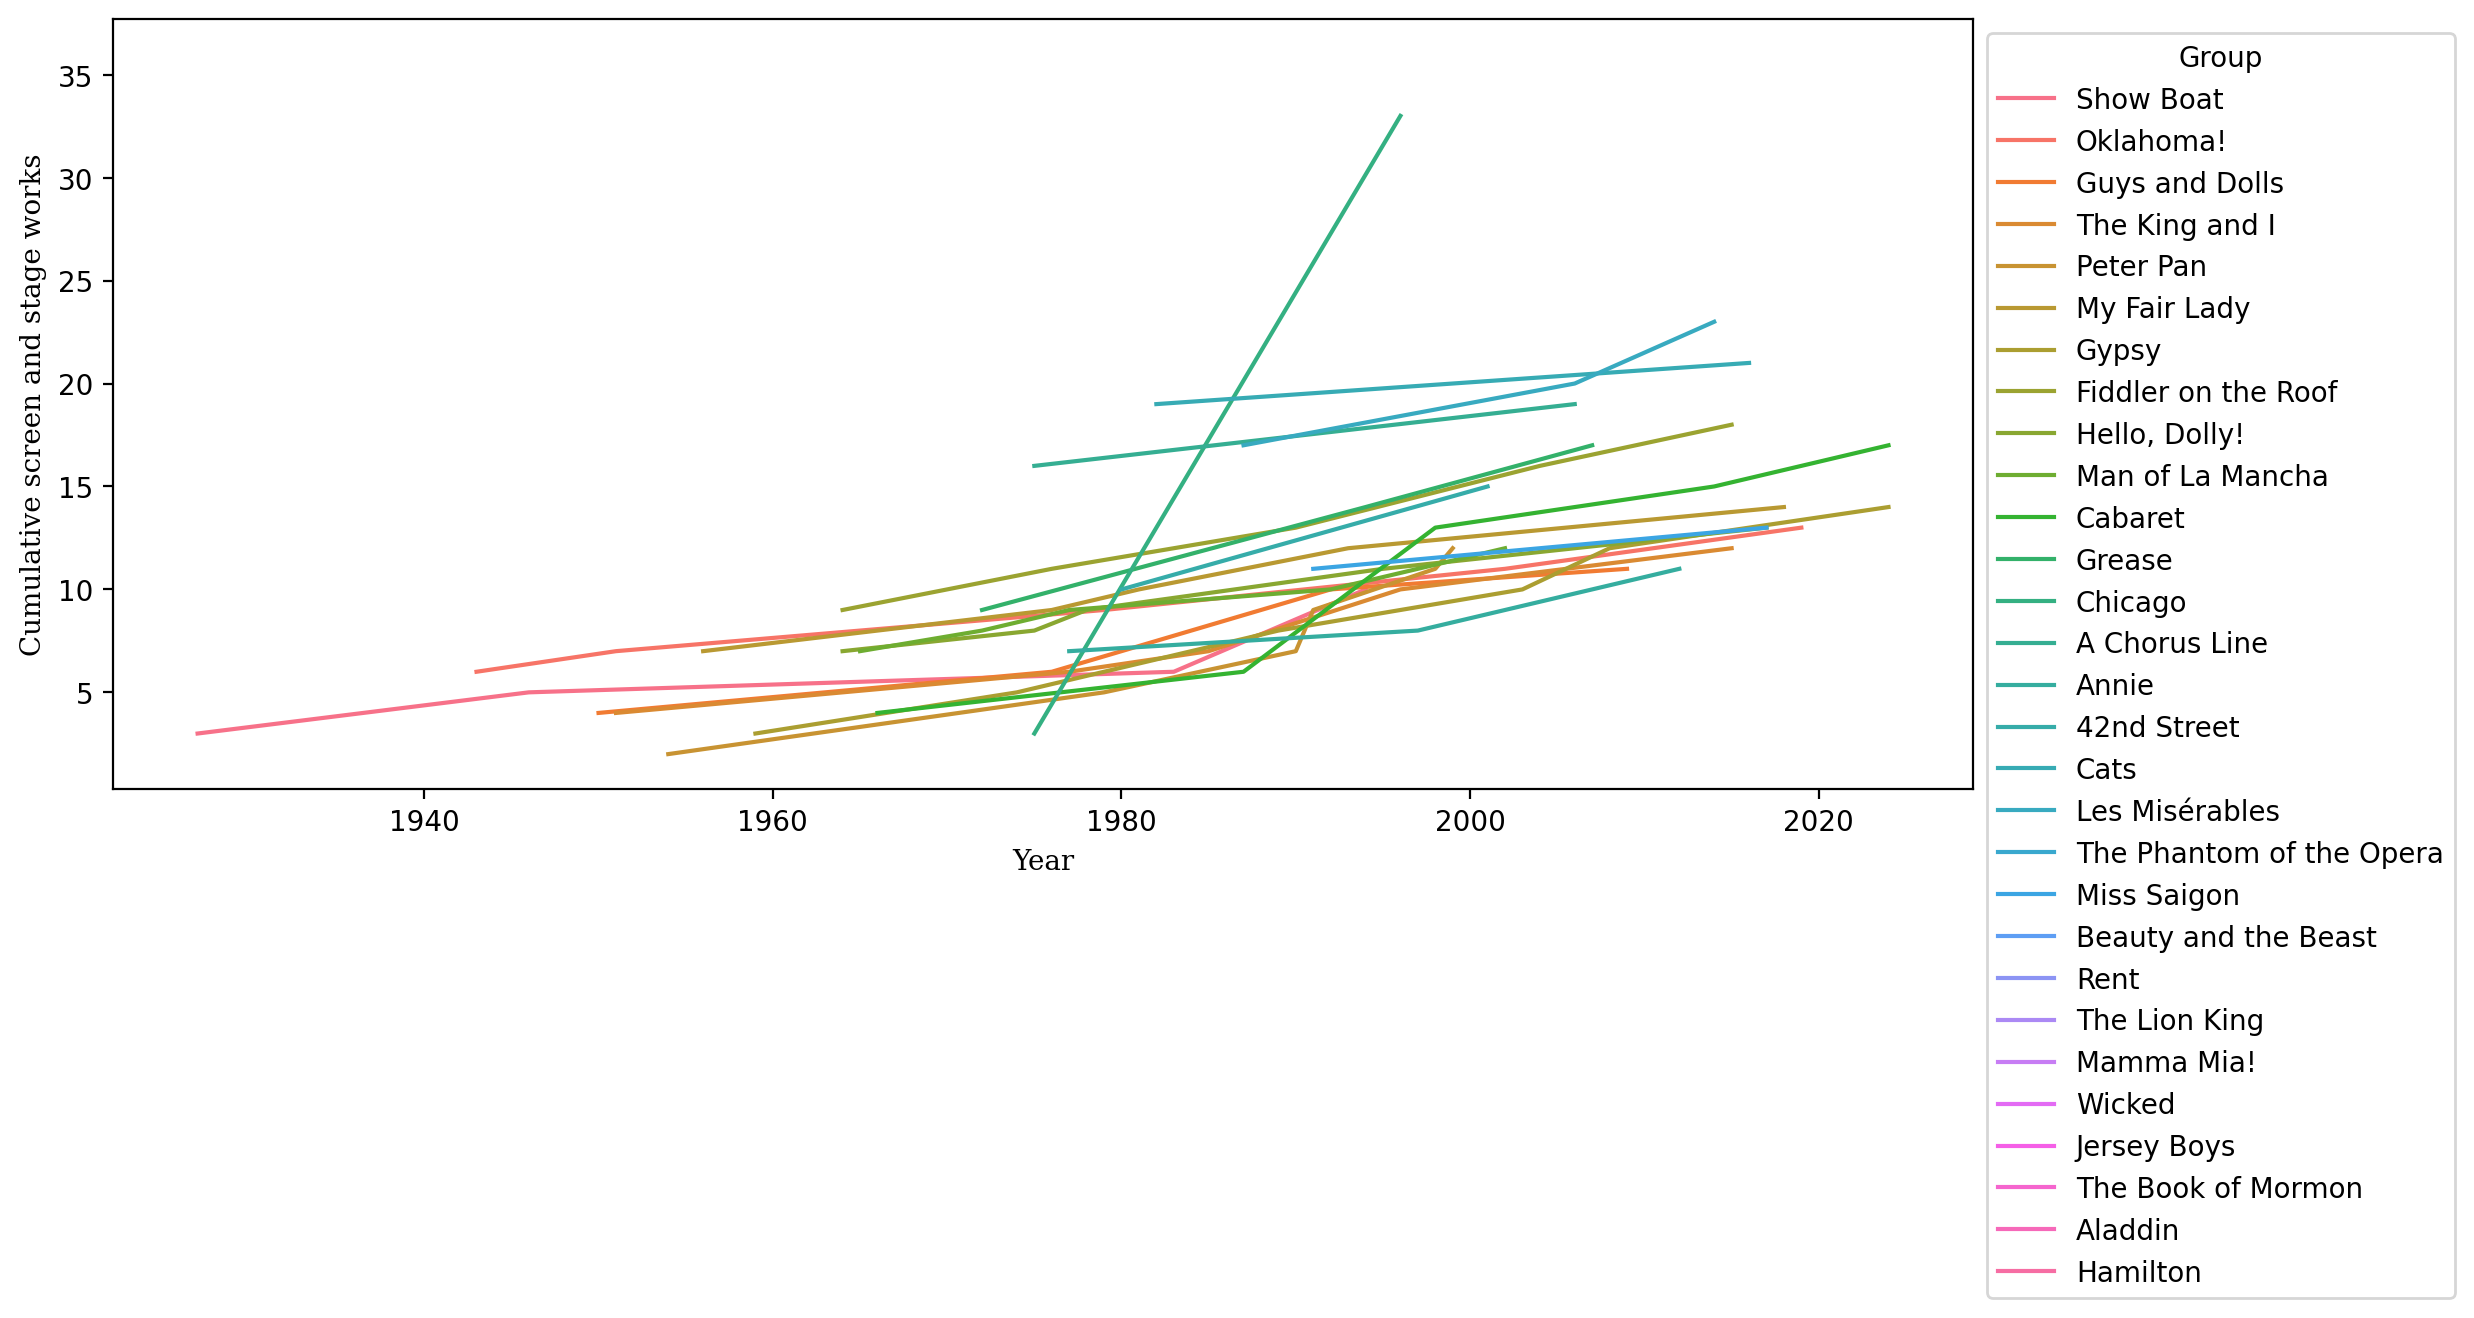

In [ ]:
#st_sc_df = work_df_strict.copy()
st_sc_df = work_df_strict.loc[work_df_strict['type_id'].isin(['11', '12', '13', '14', '21', '22'])]
st_sc_df = pd.merge(st_sc_df, stage_work_df, on='work_id', how='inner')[['work_id', 'property_id_x', 'type_id_x', 'title_x', 'year_x','closing_year']]
st_sc_df.columns = ['work_id', 'property_id', 'type_id', 'title', 'year','closing_year']


# counts = st_sc_df['property_id'].value_counts()
# valid_ids = counts[counts >= 2].index
# filt_st_sc_df = st_sc_df[st_sc_df['property_id'].isin(valid_ids)]
filt_st_sc_df = st_sc_df.copy()
filt_st_sc_df['work_weight'] = 1
# calculate the weight HERE:
filt_st_sc_df.loc[filt_st_sc_df['type_id'].isin(['11', '12', '13', '14']), 'work_weight'] += filt_st_sc_df['closing_year'] - filt_st_sc_df['year']

event_df = filt_st_sc_df.groupby(['property_id', 'year'])['work_weight'].sum().reset_index()
event_df = event_df.sort_values(by='year')

event_df['cum_works'] = event_df.groupby('property_id')['work_weight'].cumsum()
# counts = st_sc_df['property_id'].value_counts()
# valid_ids = counts[counts >= 4].index
# filt_event_df = event_df[event_df['property_id'].isin(valid_ids)]
df_sorted = event_df.sort_values(by=['property_id', 'year'])
last_rows = df_sorted.groupby('property_id').tail(1)
filt_event_df1 = event_df[event_df['property_id'].isin(last_rows[last_rows['cum_works'] >= 10]['property_id'])]


# some_names = ['Stephen Sondheim', 'Richard Rodgers', 'Oscar Hammerstein II', 'Fred Ebb', 'Frank Loesser', 'Alan Jay Lerner', 'Leonard Bernstein']
# filt_event_df2 = event_df[event_df['name'].isin(some_names)]

# let's try filtering by steepest slope:
slopes = filt_event_df.groupby('property_id').apply(lambda group: linregress(group['year'], group['cum_works']).slope).reset_index()
slopes.columns = ['property_id', 'slope']
# Filter top-N steepest (absolute slope)
top_n = 15
top_props = slopes.reindex(slopes['slope'].abs().sort_values(ascending=False).index).head(top_n)['property_id']
# Step 3: Filter original data
slope_df = filt_event_df[filt_event_df['property_id'].isin(top_props)]

# Plot cumulative sum
plt.figure(figsize=(12, 5))
plot = sns.lineplot(data=filt_event_df1, x='year', y='cum_works', hue='property_id')
#plt.title('Timing of first film adaptation of a musical', fontfamily='serif', fontsize=12)
plt.xlabel('Year', fontfamily="serif")
plt.ylabel('Cumulative screen and stage works', fontfamily="serif")

label_map = dict(zip(stage_work_df['property_id'], stage_work_df['title']))
handles, labels = plot.get_legend_handles_labels()
new_labels = [label_map.get(label, label) for label in labels]
plot.legend(handles=handles, labels=new_labels, title='Group',bbox_to_anchor=(1, 1))

Let's try instead plotting TMDB popularity against cummulative run length of stage productions

C:\Users\12676\AppData\Local\Temp\ipykernel_22232\2603444936.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=screen_work_df1_filt, x='total_stage_years', y='tmdb_rating', palette='coolwarm', ax=ax)


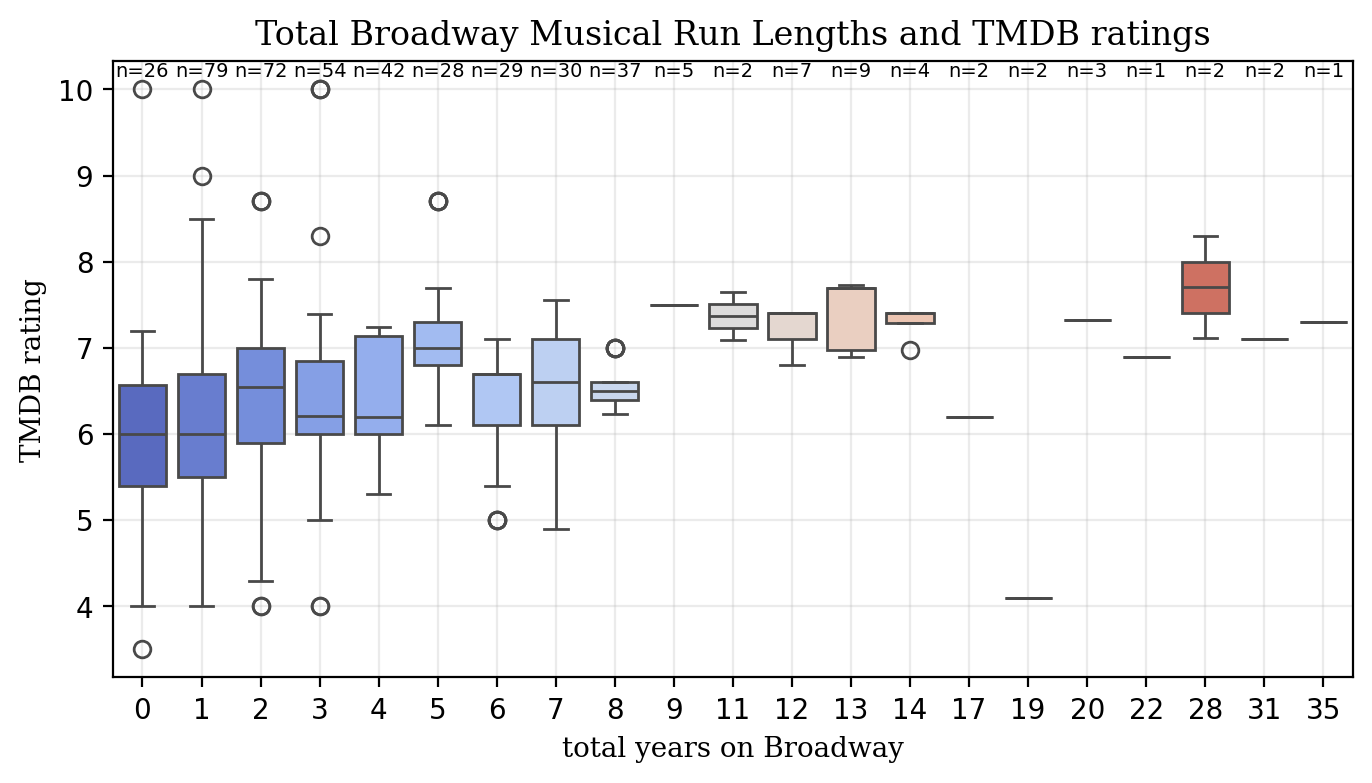

In [44]:
stage_work_df1 = stage_work_df.copy()
#screen_work_df1 = screen_work_df.copy()
screen_work_df1 = screen_work_df_strict.loc[screen_work_df['type_id'].isin(['21'])] # just movies

# event_df = filt_st_sc_df.groupby(['property_id', 'year'])['work_weight'].sum().reset_index()
# event_df = event_df.sort_values(by='year')

# # Calculate cumulative sum of quotes per year
# event_df['cum_works'] = event_df.groupby('property_id')['work_weight'].sum()
stage_work_df1['run_length']=stage_work_df1['closing_year'] - stage_work_df1['year']
stage_work_df1['total_stage_years']=stage_work_df1.groupby('property_id')['run_length'].transform('sum')
screen_work_df1 = pd.merge(screen_work_df1, stage_work_df1, on='property_id', how='left')[['work_id_x', 'property_id', 'type_id_x', 'title_x', 'release_date',
       'tmdb_url', 'us_origin', 'tmdb_popularity', 'budget', 'revenue',
       'tmdb_rating', 'tmdb_vote_count', 'assoc_stage_work_id', 'year_x', 'total_stage_years']]
screen_work_df1.columns = ['work_id', 'property_id', 'type_id', 'title', 'release_date',
       'tmdb_url', 'us_origin', 'tmdb_popularity', 'budget', 'revenue',
       'tmdb_rating', 'tmdb_vote_count', 'assoc_stage_work_id', 'year', 'total_stage_years']
#screen_work_df1['total_stage_years']=stage_work_df1.groupby('property_id')['run_length'].transform('sum')
#screen_work_df1.loc[screen_work_df1['total_stage_years']>1]
#plt.scatter(screen_work_df1['total_stage_years'], screen_work_df1['tmdb_rating'], s=5)

screen_work_df1_filt = screen_work_df1.loc[screen_work_df1['tmdb_rating']>0]
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=screen_work_df1_filt, x='total_stage_years', y='tmdb_rating', palette='coolwarm', ax=ax)
plt.xlabel('total years on Broadway', fontfamily='serif')
plt.ylabel('TMDB rating', fontfamily='serif')
plt.title('Total Broadway Musical Run Lengths and TMDB ratings', fontfamily='serif')
plt.grid(alpha=0.25)
counts31 = screen_work_df1_filt['total_stage_years'].value_counts().sort_index()
# for i, category in enumerate(counts31.items()):
#     count = counts31[category] if category in counts31 else 0  # Get count or default to 0
#     ax.annotate(f'n={count}', xy=(i, screen_work_df1_filt['tmdb_rating'].max()), xytext=(0,5), 
#                 textcoords="offset points", ha='center', fontsize=7, color="black")
    

for i, (cat, count) in enumerate(counts31.items()):
    ax.text(i, screen_work_df1_filt['tmdb_rating'].max() + 0.1, f'n={count}', 
            ha='center', va='bottom', fontsize=7, color='black')
    
plt.show()
#screen_work_df1.loc[screen_work_df1['total_stage_years']>20]
#stage_work_df1.loc[stage_work_df1['property_id']==]


In [17]:
stage_work_df1

,work_id,property_id,type_id,title,ibdb_url,opening_date,preview_start_date,closing_date,year,closing_year,run_length,total_stage_years
0,00000011,0000,11,'Round New York in 80 Minutes,/broadway-production/round-new-york-in-80-minu...,1899-11-06,,1900-02-24,1899,1900,1,1
1,00010011,0001,11,"""It's a Bird...It's a Plane...It's Superman""",/broadway-production/its-a-birdits-a-planeits-...,1966-03-29,1966-03-09,1966-07-17,1966,1966,0,0
2,00020011,0002,11,(From) Broadway to Paris,/broadway-production/from-broadway-to-paris-7525,1912-11-20,,1913-01-25,1912,1913,1,1
3,00030011,0003,11,[title of show],/broadway-production/title-of-show-478457,2008-07-17,2008-07-05,2008-10-12,2008,2008,0,0
4,00040011,0004,11,& Juliet,/broadway-production/-juliet-534962,2022-11-17,2022-10-28,NaT,2022,2025,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3092,25810011,2581,11,The Best Little Whorehouse Goes Public,/broadway-production/the-best-little-whorehous...,1994-05-10,1994-04-14,1994-05-22,1994,1994,0,0
3093,25820011,2582,11,Fine and Dandy,/broadway-production/fine-and-dandy-9442,1930-09-23,,1931-05-02,1930,1931,1,1
3094,25830011,2583,11,The Dancing Girl,/broadway-production/the-dancing-girl-9195,1923-01-24,,1923-05-12,1923,1923,0,0
3095,25840011,2584,11,The Passing Show of 1922,/broadway-production/the-passing-show-of-1922-...,1922-09-20,,1922-12-02,1922,1922,0,0


Let's just look at a countplot for different kinds of things:

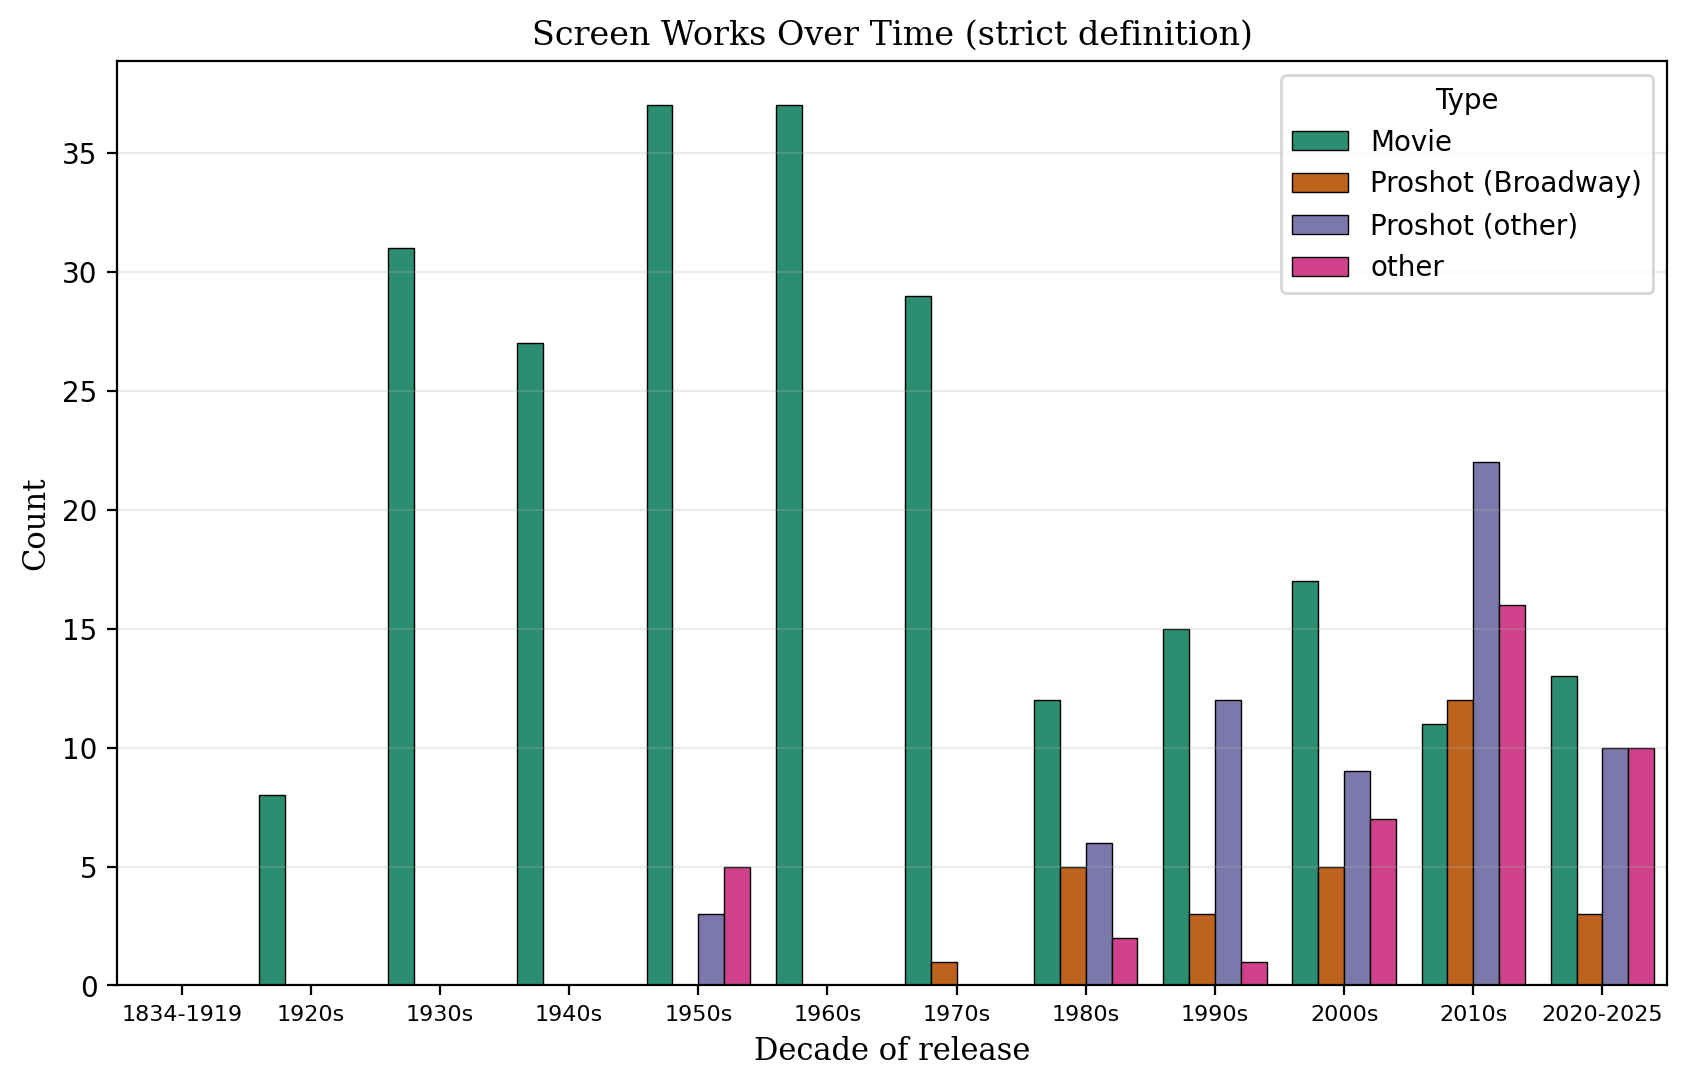

In [24]:
proshot_df = screen_work_df.loc[screen_work_df['type_id'].isin(['22', '23'])]
proshot_df_strict = screen_work_df_strict.loc[screen_work_df_strict['type_id'].isin(['22', '23'])]
bway_proshot_df = screen_work_df.loc[screen_work_df['type_id']=='22']
movie_df = screen_work_df.loc[screen_work_df['type_id']=='21']
other_df = screen_work_df.loc[screen_work_df['type_id']=='24']

bins3 = [1834,1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2025]
bin_labels3 = ['1834-1919', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020-2025']

binned_df=screen_work_df_strict.copy()
binned_df['year_bin'] = pd.cut(binned_df['year'], bins=bins3, labels=bin_labels3, include_lowest=True)
binned_df['year_bin']=binned_df['year_bin'].astype(str) 

fig, ax = plt.subplots(figsize=(10, 6))
# sns.countplot(data=binned_df, x='year_bin', color='#bfa4be', order=bin_labels3, width=1, edgecolor='black', linewidth=.5)
sns.countplot(data=binned_df, x='year_bin', hue='type_id', order=bin_labels3, edgecolor='black', linewidth=.5, ax=ax, palette='Dark2')
plt.ylabel('Count', fontfamily="serif", fontsize=11)
plt.xlabel('Decade of release', fontfamily="serif", fontsize=11)
#plt.ylim(top=120)
#plt.yticks(range(0, 100, 10))
plt.xticks(fontsize=8)
plt.title('Screen Works Over Time (strict definition)', fontfamily="serif", fontsize=12)
plt.grid(axis='y', alpha=0.25)

handles, labels = ax.get_legend_handles_labels()
new_labels = ['Movie', 'Proshot (Broadway)', 'Proshot (other)', 'other']
ax.legend(handles=handles, labels=new_labels, title='Type')

#binned_df.loc[binned_df['year_bin']=='2010s'].loc[binned_df['type_id']=='23']
#binned_df.loc[binned_df['title']=='42nd Street']
#binned_df

In [19]:
screen_work_df

,work_id,property_id,type_id,title,release_date,tmdb_url,us_origin,tmdb_popularity,budget,revenue,tmdb_rating,tmdb_vote_count,assoc_stage_work_id,year
0,00010021,0001,21,"It's a Bird, It's a Plane, It's Superman!",1975-02-21,themoviedb.org/movie/142064,1,1.160250,0.0,0.0,4.000,14,,1975
1,00060021,0006,21,13: The Musical,2022-08-12,themoviedb.org/movie/673271,1,0.861963,0.0,0.0,6.013,40,,2022
2,00100021,0010,21,1776,1972-11-09,themoviedb.org/movie/14902,1,0.367639,6000000.0,2800000.0,6.800,75,,1972
3,00140022,0014,22,42nd Street,1986-08-01,themoviedb.org/movie/473572,1,0.066227,0.0,0.0,0.000,0,00140111,1986
4,00140121,0014,21,42nd Street,1933-03-11,themoviedb.org/movie/3062,1,4.317750,439000.0,2281000.0,6.900,187,,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,25290023,2529,23,Wonderful Town,2018-01-01,themoviedb.org/movie/575250,1,0.026429,0.0,0.0,0.000,0,,2018
604,25290124,2529,24,Wonderful Town,2002-01-01,themoviedb.org/movie/265613,1,0.053536,0.0,0.0,0.000,0,,2002
605,25290223,2529,23,Wonderful Town,1958-11-30,themoviedb.org/movie/301906,1,0.317500,0.0,0.0,6.600,5,,1958
606,25370021,2537,21,Xanadu,1980-08-08,themoviedb.org/movie/15668,1,0.816431,20000000.0,22762571.0,5.700,266,,1980
